In [70]:
import numpy as np
import pandas as pd
import datetime
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.path import Path
from matplotlib.patches import PathPatch

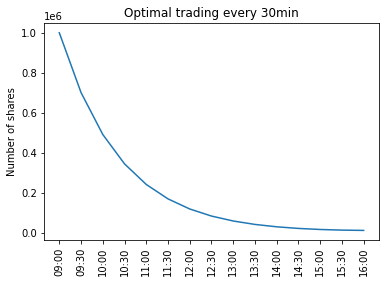

In [71]:
#ex3
mu = 0
P0 =100
n0=1000000
lam = 0.0001*2 #when you trade u stocks you pay lam/2*u
N = 14 #number of trading per day, trading every 30min
sig = (0.3/np.sqrt(252))/np.sqrt(N)
gamma = 1
n = [1000000]*(N+1)
qt =[0]*(N+1)
Qt = [0]*(N+1)
aimt = [0]*N
taut = [0]*N

for i in range(N-1,-1,-1):
    Qt[i]=(lam-lam**2/(lam+gamma*sig**2+Qt[i+1]))
    qt[i]=lam*(mu+qt[i+1])/(lam+gamma*sig**2+Qt[i+1])
    aimt[i]=(qt[i+1]+mu)/(gamma*sig**2+Qt[i+1])
    taut[i]=(gamma*sig**2+Qt[i+1])/(lam+gamma*sig**2+Qt[i+1])

for i in range(N):
    n[i+1]= (1-taut[i])*n[i]+taut[i]*aimt[i]
    
date = [datetime.datetime(2019,1,1,9,0)]* (N+1)
delta = datetime.timedelta(minutes = 30)
for i in range(N):
    date[i+1] = date[i]+delta
    
date_str = []
for i in range(N+1):
    date_str.append(date[i].strftime("%H:%M"))
    
plt.plot(date_str,n)
plt.title("Optimal trading every 30min")
plt.ylabel("Number of shares")
plt.xticks(rotation=90)
plt.show()

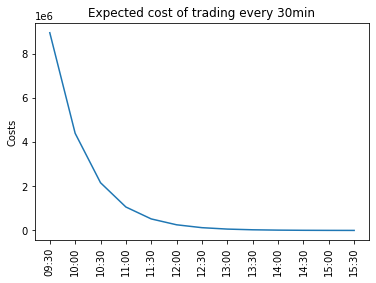

In [72]:
#expected costs of trading
cost = [0]*(N+1)
for i in range(N):
    cost[i+1]= lam/2*(n[i+1]-n[i])**2

plt.plot(date_str[1:N],cost[1:N])
plt.title("Expected cost of trading every 30min")
plt.ylabel("Costs")
plt.xticks(rotation=90)
plt.show()

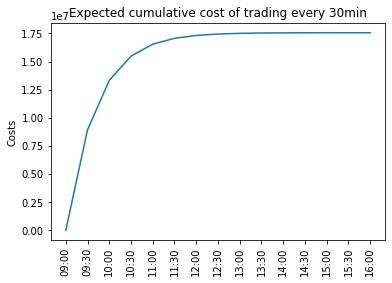

In [73]:
for i in range(1,N+1):
    cost[i]=cost[i]+cost[i-1]
plt.plot(date_str,cost)
plt.title("Expected cumulative cost of trading every 30min")
plt.ylabel("Costs")
plt.xticks(rotation=90)
plt.show()

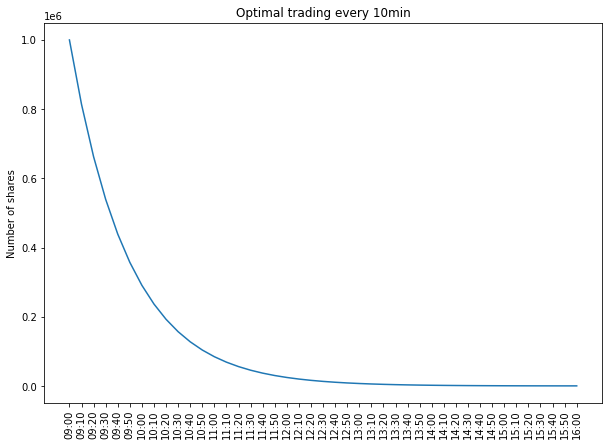

In [74]:
N = 42 #number of trading per day, trading every 10min
sig = (0.3/np.sqrt(252))/np.sqrt(N)
gamma = 1
n1 = [1000000]*(N+1)
qt =[0]*(N+1)
Qt = [0]*(N+1)
aimt = [0]*N
taut = [0]*N

for i in range(N-1,-1,-1):
    Qt[i]=(lam-lam**2/(lam+gamma*sig**2+Qt[i+1]))
    qt[i]=lam*(mu+qt[i+1])/(lam+gamma*sig**2+Qt[i+1])
    aimt[i]=(qt[i+1]+mu)/(gamma*sig**2+Qt[i+1])
    taut[i]=(gamma*sig**2+Qt[i+1])/(lam+gamma*sig**2+Qt[i+1])

for i in range(N):
    n1[i+1]= (1-taut[i])*n1[i]+taut[i]*aimt[i]
    
date1 = [datetime.datetime(2019,1,1,9,0)]* (N+1)
delta = datetime.timedelta(minutes = 10)
date1_str = []
for i in range(N):
    date1[i+1] = date1[i]+delta
    
for i in range(N+1):
    date1_str.append(date1[i].strftime("%H:%M"))
    
plt.figure(figsize=(10,7))
plt.plot(date1_str,n1)
plt.title("Optimal trading every 10min")
plt.ylabel("Number of shares")
plt.xticks(rotation=90)
plt.show()

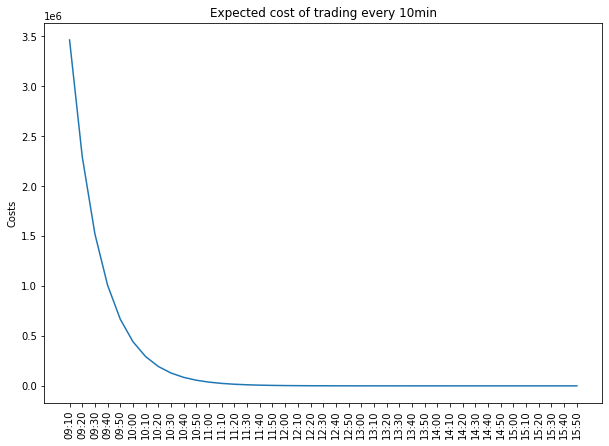

In [75]:
#expected costs of trading
cost1 = [0]*(N+1)
for i in range(N):
    cost1[i+1]= lam/2*(n1[i+1]-n1[i])**2

plt.figure(figsize=(10,7))
plt.plot(date1_str[1:N],cost1[1:N])
plt.title("Expected cost of trading every 10min")
plt.ylabel("Costs")
plt.xticks(rotation=90)
plt.show()

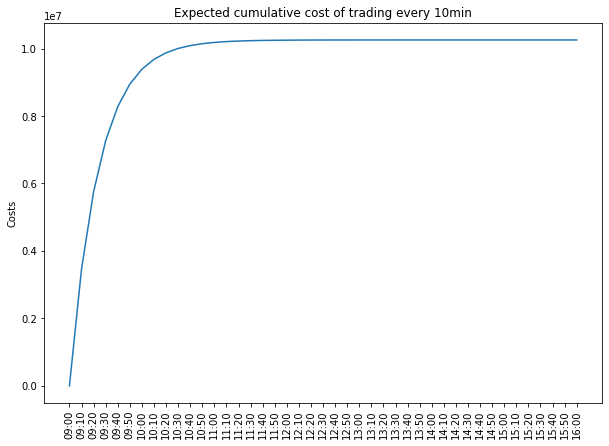

In [76]:
for i in range(1,N+1):
    cost1[i]=cost1[i]+cost1[i-1]

plt.figure(figsize=(10,7))
plt.plot(date1_str,cost1)
plt.title("Expected cumulative cost of trading every 10min")
plt.ylabel("Costs")
plt.xticks(rotation=90)
plt.show()

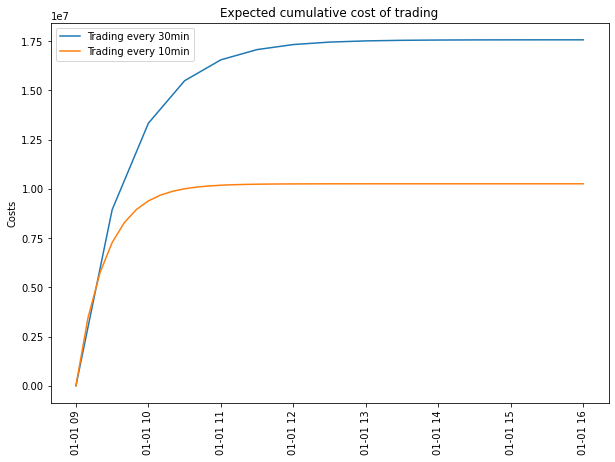

In [78]:
plt.figure(figsize=(10,7))
plt.plot(date,cost,label="Trading every 30min")
plt.plot(date1,cost1,label="Trading every 10min")
plt.legend()
plt.title("Expected cumulative cost of trading")
plt.ylabel("Costs")
plt.xticks(rotation=90)
plt.show()

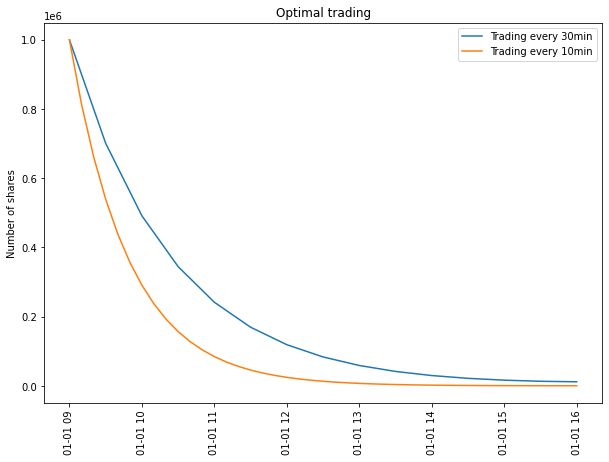

In [79]:
plt.figure(figsize=(10,7))
plt.plot(date, n,label="Trading every 30min")
plt.plot(date1,n1,label="Trading every 10min")
plt.legend()
plt.title("Optimal trading")
plt.ylabel("Number of shares")
plt.xticks(rotation=90)
plt.show()

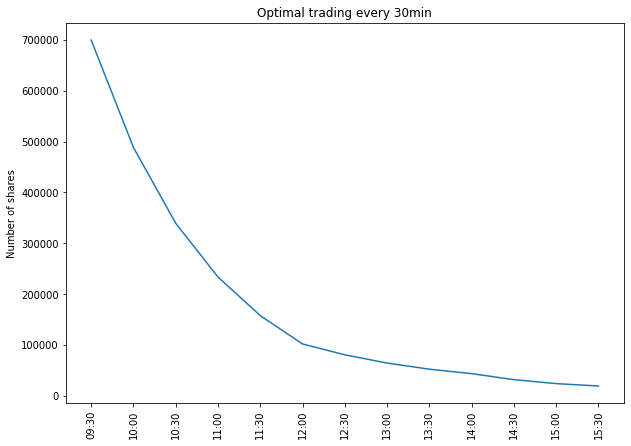

In [82]:
#f
mu = 0
P0 =100
n0=1000000
lam = 0.0001*2 #when you trade u stocks you pay lam/2*u
N = 14 #number of trading per day, trading every 30min
sig = (0.3/np.sqrt(252))/np.sqrt(N)
gamma = 1
n2 = [1000000]*(N+1)
qt =[0]*(N+1)
Qt = [0]*(N+1)
aimt = [0]*N
taut = [0]*N
lam2 = [0]*N
for i in range(N):
    lam2[i]=lam+lam* (date[i].time() >= datetime.datetime(2019,1,1,12,0).time())*(date[i].time() < 
                                                                           datetime.datetime(2019,1,1,14,0).time())
    
for i in range(N-1,-1,-1):
    Qt[i]=(lam2[i]-lam2[i]**2/(lam2[i]+gamma*sig**2+Qt[i+1]))
    qt[i]=lam2[i]*(mu+qt[i+1])/(lam2[i]+gamma*sig**2+Qt[i+1])
    aimt[i]=(qt[i+1]+mu)/(gamma*sig**2+Qt[i+1])
    taut[i]=(gamma*sig**2+Qt[i+1])/(lam2[i]+gamma*sig**2+Qt[i+1])

for i in range(N):
    n2[i+1]= (1-taut[i])*n2[i]+taut[i]*aimt[i]
plt.figure(figsize=(10,7))
plt.plot(date_str[1:N],n2[1:N])
plt.title("Optimal trading every 30min")
plt.ylabel("Number of shares")
plt.xticks(rotation=90)
plt.show()

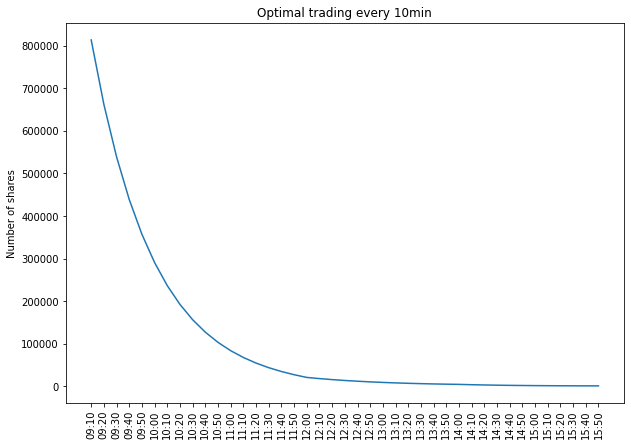

In [83]:
mu = 0
P0 =100
n0=1000000
lam = 0.0001*2 #when you trade u stocks you pay lam/2*u
N = 42 #number of trading per day, trading every 30min
sig = (0.3/np.sqrt(252))/np.sqrt(N)
gamma = 1
n3 = [1000000]*(N+1)
qt =[0]*(N+1)
Qt = [0]*(N+1)
aimt = [0]*N
taut = [0]*N
lam3 = [0]*N


for i in range(N):
    lam3[i]=lam+lam* (date1[i].time() >= datetime.datetime(2019,1,1,12,0).time())*(date1[i].time() < 
                                                                            datetime.datetime(2019,1,1,14,0).time())
    
for i in range(N-1,-1,-1):
    Qt[i]=(lam3[i]-lam3[i]**2/(lam3[i]+gamma*sig**2+Qt[i+1]))
    qt[i]=lam3[i]*(mu+qt[i+1])/(lam3[i]+gamma*sig**2+Qt[i+1])
    aimt[i]=(qt[i+1]+mu)/(gamma*sig**2+Qt[i+1])
    taut[i]=(gamma*sig**2+Qt[i+1])/(lam3[i]+gamma*sig**2+Qt[i+1])

for i in range(N):
    n3[i+1]= (1-taut[i])*n3[i]+taut[i]*aimt[i]
plt.figure(figsize=(10,7))
plt.plot(date1_str[1:N],n3[1:N])
plt.title("Optimal trading every 10min")
plt.ylabel("Number of shares")
plt.xticks(rotation=90)
plt.show()

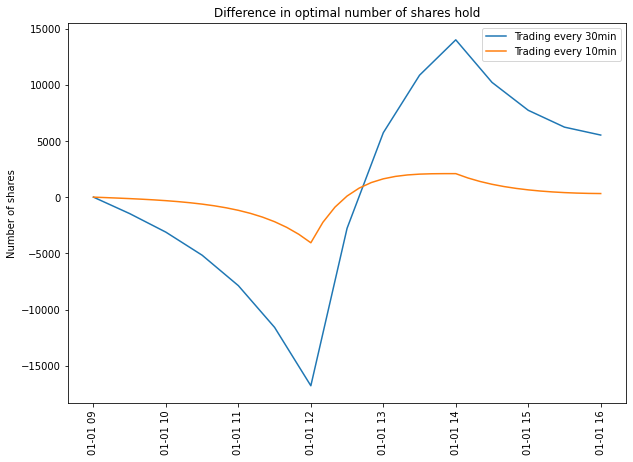

In [84]:
#comparing the solutions
diff= [0]*15
plt.figure(figsize=(10,7))

for i in range(15):
    diff[i]=n2[i]-n[i]
plt.plot(date,diff,label="Trading every 30min")

diff1 =[0]*43
for j in range(43):
    diff1[j]=n3[j]-n1[j]
    
plt.plot(date1,diff1,label= "Trading every 10min")
plt.legend()
plt.ylabel("Number of shares")
plt.xticks(rotation=90)
plt.title("Difference in optimal number of shares hold")
plt.show()